In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import simple_features as sf

In [2]:
def plot_shot_counts_by_distance(df):
    """
    Plots a histogram of shot counts by distance, separating goals and no-goals.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `distance_from_net` and `is_goal`.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df, 
        x='distance_from_net', 
        hue='is_goal', 
        bins=30, 
        kde=False, 
        palette={0: "blue", 1: "red"},
        element="step",
        alpha=0.6
    )
    plt.title("Shot Counts by Distance (Goals vs. No-Goals)")
    plt.xlabel("Distance from Net (Feet)")
    plt.ylabel("Count")
    plt.legend(title="Is Goal", labels=["No-Goal", "Goal"])
    plt.show()

In [3]:
def plot_shot_counts_by_angle(df):
    """
    Plots a histogram of shot counts by angle, separating goals and no-goals.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `angle_from_net` and `is_goal`.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df, 
        x='angle_from_net', 
        hue='is_goal', 
        bins=30, 
        kde=False, 
        palette={0: "blue", 1: "red"},
        element="step",
        alpha=0.6
    )
    plt.title("Shot Counts by Angle (Goals vs. No-Goals)")
    plt.xlabel("Angle from Net (Degrees)")
    plt.ylabel("Count")
    plt.legend(title="Is Goal", labels=["No-Goal", "Goal"])
    plt.show()

In [4]:
def plot_2d_histogram_distance_angle(df):
    """
    Plots a 2D histogram of distance vs. angle for all shots.

    Parameters:
        df (pd.DataFrame): DataFrame containing columns `distance_from_net` and `angle_from_net`.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df, 
        x='distance_from_net', 
        y='angle_from_net', 
        bins=(30, 30), 
        cbar=True, 
        cmap="viridis"
    )
    plt.title("2D Histogram of Distance vs. Angle")
    plt.xlabel("Distance from Net (Feet)")
    plt.ylabel("Angle from Net (Degrees)")
    plt.show()


In [12]:
def plot_goal_rate_by_distance(df):
    """
    Plots the goal rate (#goals / (#goals + #no_goals)) as a function of distance, binned by 5-meter intervals.

    Parameters:
        df (pd.DataFrame): DataFrame containing `distance_from_net` and `is_goal`.
    """
    # Create distance bins of 5 meters
    df['distance_bin'] = pd.cut(df['distance_from_net'], bins=range(0, int(df['distance_from_net'].max()) + 5, 5))
    goal_rate = df.groupby('distance_bin')['is_goal'].mean().reset_index()

    # Extract bin labels for clarity
    goal_rate['distance_bin_mid'] = goal_rate['distance_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=goal_rate, x='distance_bin_mid', y='is_goal', marker='o')
    plt.title("Goal Rate by Distance (Binned by 5 Meters)")
    plt.xlabel("Distance from Net (Feet, Binned by 5)")
    plt.ylabel("Goal Rate")
    plt.ylim(0, 1)
    plt.show()

In [19]:
def plot_goal_rate_by_angle(df):
    """
    Plots the goal rate (#goals / (#goals + #no_goals)) as a function of angle, binned by 5-degree intervals.

    Parameters:
        df (pd.DataFrame): DataFrame containing `angle_from_net` and `is_goal`.
    """
    # Create angle bins of 5 degrees
    df['angle_bin'] = pd.cut(df['angle_from_net'], bins=range(int(df['angle_from_net'].min()) - 5, int(df['angle_from_net'].max()) + 5, 5))
    goal_rate = df.groupby('angle_bin')['is_goal'].mean().reset_index()

    # Extract bin labels for clarity
    goal_rate['angle_bin_mid'] = goal_rate['angle_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=goal_rate, x='angle_bin_mid', y='is_goal', marker='o')
    plt.title("Goal Rate by Angle (Binned by 5 Degrees)")
    plt.xlabel("Angle from Net (Degrees, Binned by 5)")
    plt.ylabel("Goal Rate")
    plt.ylim(0, 1)
    plt.show()


In [21]:
def plot_goals_by_distance_empty_net(df):
    """
    Plots a histogram of goals by distance, separating empty net and non-empty net events
    with separate scales for each and a twin axis.

    Parameters:
        df (pd.DataFrame): DataFrame containing `distance_from_net`, `empty_net`, and `is_goal`.
    """
    # Filter for goals only
    goals_df = df[df['is_goal'] == 1]

    # Separate data for non-empty net and empty net
    non_empty_net = goals_df[goals_df['empty_net'] == 0]
    empty_net = goals_df[goals_df['empty_net'] == 1]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot non-empty net goals
    ax1.hist(non_empty_net['distance_from_net'], bins=30, alpha=0.6, color='blue', label='Non-Empty Net')
    ax1.set_xlabel("Distance from Net (Feet)")
    ax1.set_ylabel("Count (Non-Empty Net Goals)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title("Goals by Distance (Empty Net vs. Non-Empty Net)")

    # Plot empty net goals on a separate axis
    ax2 = ax1.twinx()
    ax2.hist(empty_net['distance_from_net'], bins=30, alpha=0.6, color='orange', label='Empty Net', weights=np.ones(len(empty_net)) * 10)  # Scale up by 10x
    ax2.set_ylabel("Count (Empty Net Goals)", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Legends
    fig.tight_layout()
    plt.show()


In [15]:
def find_anomalous_events(df):
    """
    Identifies potential anomalous events based on domain knowledge.

    Parameters:
        df (pd.DataFrame): DataFrame containing all shots.

    Returns:
        pd.DataFrame: DataFrame of candidate anomalous events.
    """
    return df[
        (df['is_goal'] == 1) &
        (df['empty_net'] == 0) & 
        (df['x_coord'] < 0)  # Defensive zone
    ]


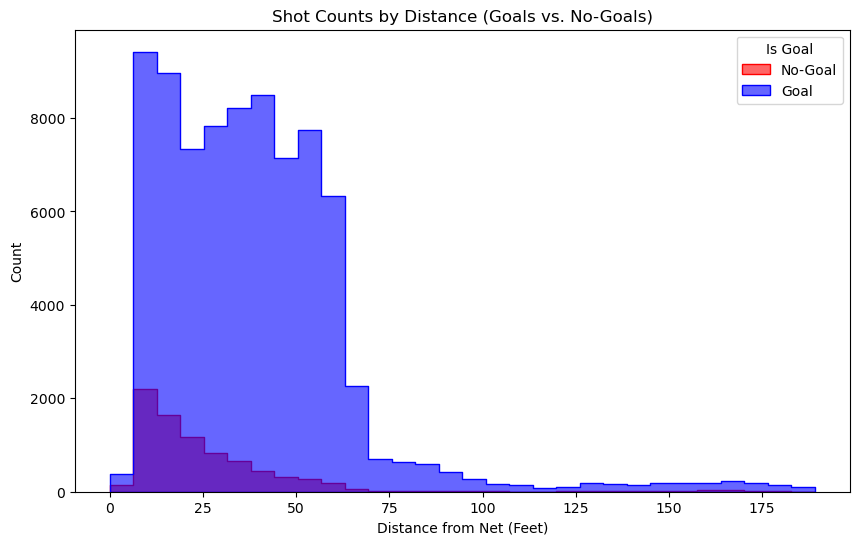

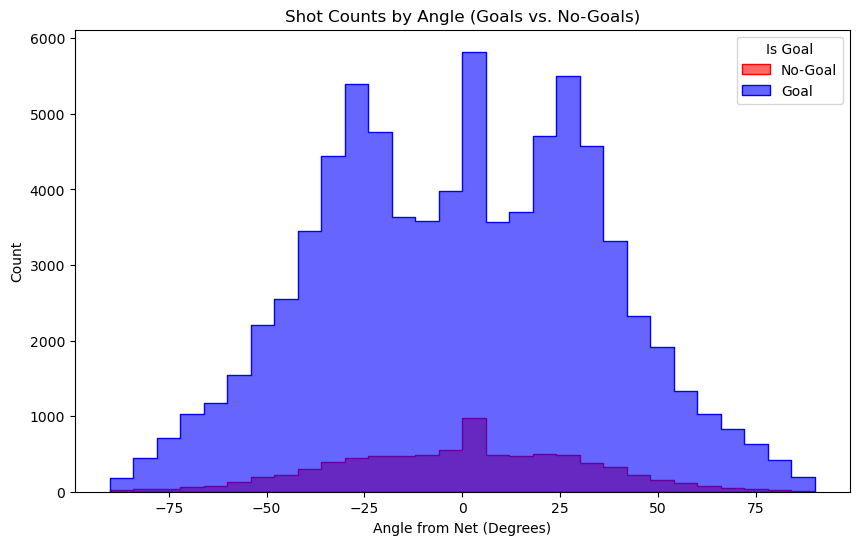

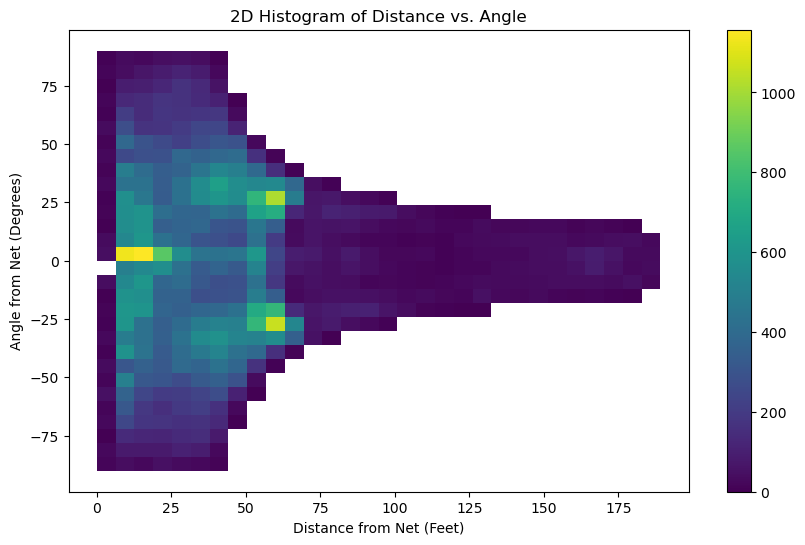

/tmp/ipykernel_573807/246912385.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate = df.groupby('distance_bin')['is_goal'].mean().reset_index()


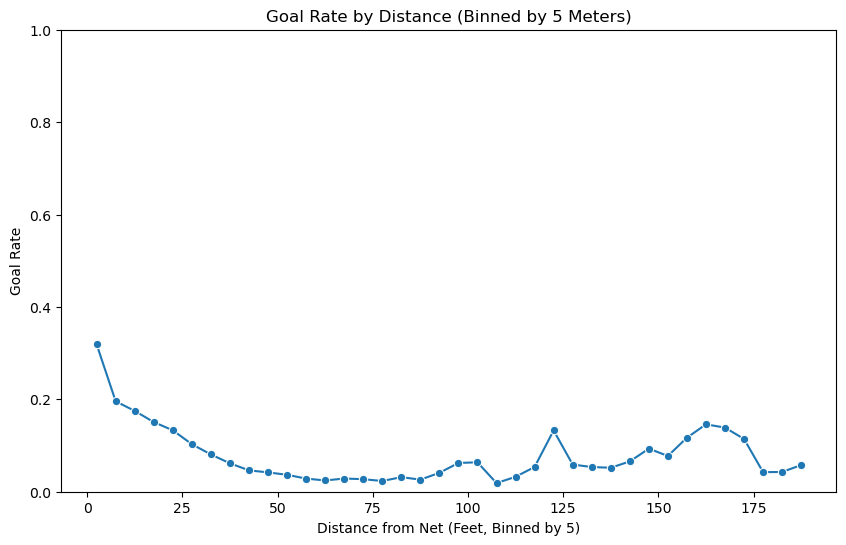

/tmp/ipykernel_573807/151835303.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate = df.groupby('angle_bin')['is_goal'].mean().reset_index()


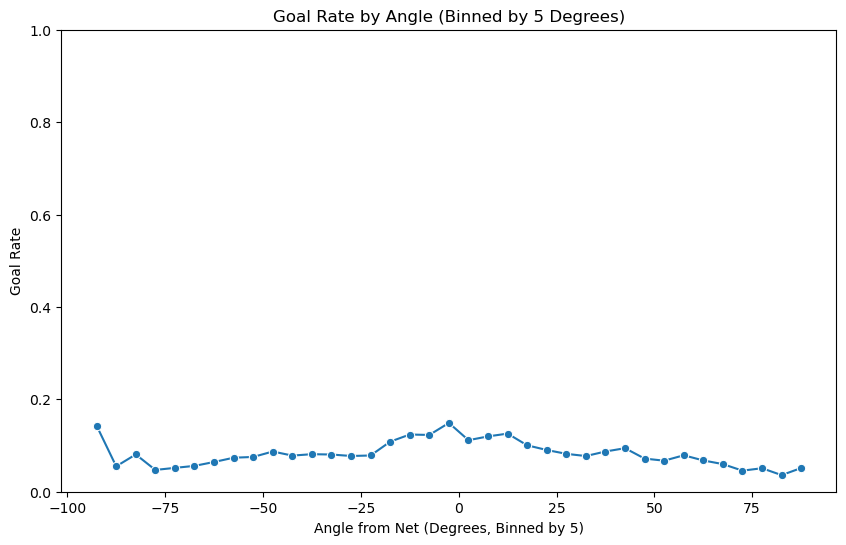

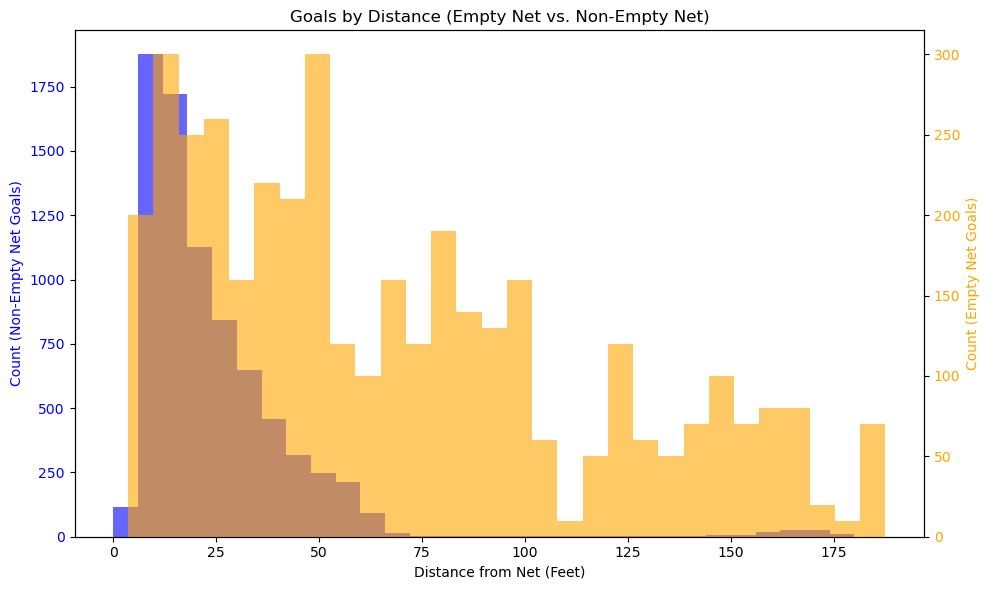

          game_id  event_id event_type  period time_in_period time_remaining  \
20     2017020019       284       goal       2          02:52          17:08   
24     2017020019       426       goal       2          19:32          00:28   
43     2017020034        67       goal       1          06:28          13:32   
46     2017020034        98       goal       1          18:56          01:04   
87     2017020046       459       goal       2          09:58          10:02   
...           ...       ...        ...     ...            ...            ...   
86986  2017030411        77       goal       1          07:15          12:45   
86990  2017030411       260       goal       1          18:19          01:41   
87006  2017030411       538       goal       3          02:41          17:19   
87010  2017030411       715       goal       3          09:44          10:16   
87022  2017030412        76       goal       1          07:58          12:02   

       team_id  x_coord  y_coord  shoot

In [22]:
# Load and preprocess your data
df = pd.read_csv('../dataset/simple_engineered/2017/augmented_data.csv')

# Generate visualizations
plot_shot_counts_by_distance(df)
plot_shot_counts_by_angle(df)
plot_2d_histogram_distance_angle(df)
plot_goal_rate_by_distance(df)
plot_goal_rate_by_angle(df)
plot_goals_by_distance_empty_net(df)

# Identify and inspect anomalous events
anomalous_events = find_anomalous_events(df)
print(anomalous_events)
